### Session 2: Training a network w/ Tensorflow

lecture: https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

### Creating a Neural Network

##### create some dummy data 

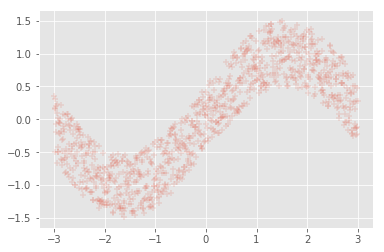

In [3]:
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
## create a sign wave with some random noise
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

##### Define Cost

In [7]:
# start an interactive session
sess = tf.InteractiveSession()
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')
# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

(array([   8.,   27.,   82.,  194.,  257.,  199.,  143.,   56.,   28.,    6.]),
 array([-0.29905078, -0.23590375, -0.17275673, -0.10960971, -0.04646268,
         0.01668434,  0.07983136,  0.14297839,  0.20612541,  0.26927243,
         0.33241946]),
 <a list of 10 Patch objects>)

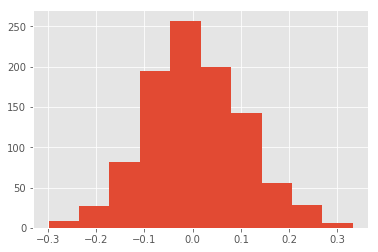

In [11]:
n = tf.random_normal([1000],stddev=0.1).eval()
plt.hist(n)

In [ ]:
# initiate weight with a random small number 
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')
# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)
cost = distance(Y_pred, Y)